<a href="https://colab.research.google.com/github/pranavram2005/Tumor_Detection_YOLOv8/blob/main/YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create two folder, **train** and **valid** and upload the images respectively.
Import the **Ultralytics** library which contains the **YOLOv8** model.

In [ ]:
%pip install ultralytics
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns
import torch
import numpy as np
sns.set_style('darkgrid')

%matplotlib inline

In [ ]:
from ultralytics import YOLO

model = YOLO("best.pt")


0: 640x512 3 MRIs, 30.1ms
Speed: 4.3ms preprocess, 30.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 512)


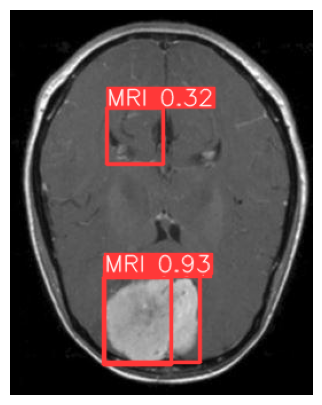

In [ ]:
import matplotlib.pyplot as plt
import cv2
img="y709.jpg"
image = cv2.imread(img)

    # Pass the image through the detection model and get the result
detect_result = model(image)

    # Plot the detections
detect_img = detect_result[0].plot()

    # Convert the image to RGB format
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (5,5))
plt.axis('off')
plt.imshow(detect_img)

Plot an image just for checking the dimensions

(380, 310, 3)


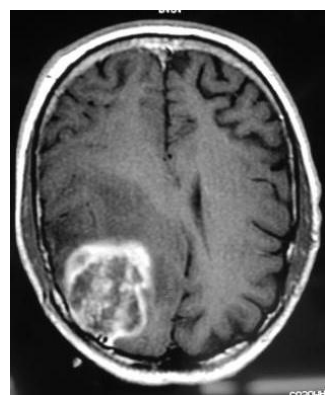

In [ ]:
img0 = "train/y104.jpg"
_ = plt.figure(figsize = (5,5))
_ = plt.axis('off')
_ = plt.imshow(mpimg.imread(img0))
a=mpimg.imread(img0)
print(a.shape)



*   Loop over some random images and plot the detected objects.

*   Classify the annotation as **polygon** or **ellipse** according to the given **json data**.
*   Find its x_center,y_center,width and height of the annotations


*   Plot the annotations using **openCV**


*   Do the same for ellipse. Convert **BGR** to **RGB**






In [ ]:
import json

train_img = "train"
test_img = "tests"
valid_img = "valid"

image_files = os.listdir(train_img)

random_images = random.sample(image_files, 16)

fig, axs = plt.subplots(4, 4, figsize=(16, 16))

for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # Load the image
    image_path = os.path.join(train_img, image_file)
    image = cv2.imread(image_path)
    with open("train/annotations_train.json", "r") as f:
      labeling = json.load(f)
    for i in labeling:
      annotations=labeling[str(i)]
      if str(annotations["filename"])==str(image_file) and str(annotations["regions"][0]['shape_attributes']["name"])=="polygon":
        a = annotations["regions"][0]['shape_attributes']["all_points_x"]
        b = annotations["regions"][0]['shape_attributes']["all_points_y"]
        annotations_x = a
        annotations_y = b
        image_width = annotations["size"]
        image_height = annotations["size"]
        x_center = sum(annotations_x)/len(annotations_x)
        y_center = sum(annotations_y)/len(annotations_y)
        width = max(annotations_x) - min(annotations_x)
        height = max(annotations_y) - min(annotations_y)
        x_min = int((x_center - width/2))
        y_min = int((y_center - height/2))
        x_max = int((x_center + width/2))
        y_max = int((y_center + height/2))
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)
      elif str(annotations["filename"])==str(image_file) and str(annotations["regions"][0]['shape_attributes']["name"])=="ellipse":
        cx=int(annotations["regions"][0]['shape_attributes']["cx"])
        cy=int(annotations["regions"][0]['shape_attributes']["cy"])
        rx=int(annotations["regions"][0]['shape_attributes']["rx"])
        ry=int(annotations["regions"][0]['shape_attributes']["ry"])
        theta=int(annotations["regions"][0]['shape_attributes']["theta"])
        theta_rad = np.radians(theta)
        cv2.ellipse(image, (cx, cy),(rx, ry),theta_rad,0, 360, (0, 255, 0), 2)
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()





Create folders to classify and store, train and validation **images** and **labels**

In [ ]:
os.mkdir('images')
os.mkdir('images/train')
os.mkdir('images/valid')

os.mkdir('labels')
os.mkdir('labels/train')
os.mkdir('labels/valid')

*   Store the training images using loop and get its **x_center, y_center, width and height coordinates** **normalized**  

*   Normalization is dividing x_center(and widt) by width of image and y_center(and height) by height of the image.

*   Save this data in a list named **bounds** and image name in a list named **images**.
*   Now we should store the above normalized values as a text file using the **write function**. (Also we should name the text file same as the image name)

*   Iterate this through out the entire training images






In [ ]:
bounds=[]
images=[]
from pathlib import Path
from PIL import Image
for imgt in image_files:
  for it in labeling:
      annotationst=labeling[str(it)]
      if str(annotationst["filename"])==str(imgt) and str(annotationst["regions"][0]['shape_attributes']["name"])=="polygon":
        a = annotationst["regions"][0]['shape_attributes']["all_points_x"]
        b = annotationst["regions"][0]['shape_attributes']["all_points_y"]
        image_patht = os.path.join(train_img, imgt)
        image1 = cv2.imread(image_patht)
        h,w,_ = image1.shape
        file_name = "images/train/{}"
        new_file = file_name.format(imgt)
        cv2.imwrite(new_file ,image1)
        annotations_xt = a
        annotations_yt = b
        image_widtht = annotationst["size"]
        image_heightt = annotationst["size"]
        x_centert = sum(annotations_xt)/len(annotations_xt)
        y_centert = sum(annotations_yt)/len(annotations_yt)
        widtht = max(annotations_xt) - min(annotations_xt)
        heightt = max(annotations_yt) - min(annotations_yt)
        x_min = int((x_centert - widtht/2))
        y_min = int((y_centert - heightt/2))
        bounds.append([imgt,x_centert/w,y_centert/h,widtht/w,heightt/h])
        images.append(imgt)

for j in images:
  for bound in bounds:
    if bound[0] == j:
      bound[0] = 0
      t=j.replace(".jpg",".txt")
      file_name = "labels/train/{}"
      file_real = file_name.format(t)
      with open(file_real,"w") as f:
        line = " ".join([str(x) for x in bound])
        f.write(line + "\n")
print(bounds)


[[0, 0.5288888888888889, 0.3611111111111111, 0.26222222222222225, 0.17333333333333334], [0, 0.7275517275517275, 0.2976372599014108, 0.32234432234432236, 0.33962264150943394], [0, 0.6989946120091096, 0.38019607843137254, 0.2728989612842304, 0.35833333333333334], [0, 0.6726755218216319, 0.7360681114551083, 0.2903225806451613, 0.2631578947368421], [0, 0.4696296296296297, 0.3496296296296296, 0.28, 0.19111111111111112], [0, 0.7354608440058786, 0.36806526806526807, 0.2979214780600462, 0.28846153846153844], [0, 0.3586990351696234, 0.24005440326419586, 0.35978835978835977, 0.3815028901734104], [0, 0.8569162436548223, 0.35498046875, 0.2233502538071066, 0.24609375], [0, 0.2739375320020481, 0.5496368038740921, 0.15770609318996415, 0.13559322033898305], [0, 0.553939393939394, 0.4011414594374236, 0.1511111111111111, 0.19730941704035873], [0, 0.643312101910828, 0.7340336134453782, 0.3503184713375796, 0.36764705882352944], [0, 0.6134634146341463, 0.6695934959349593, 0.32195121951219513, 0.34146341463

Repeat the same for validation.

In [ ]:
image_files_v = os.listdir(valid_img)
bounds_v=[]
images_v=[]
from pathlib import Path
with open("valid/annotations_val.json","r") as f_v:
  labeling_v = json.load(f_v)
for img_v in image_files_v:
  for i in labeling_v:
      annotations_v=labeling_v[str(i)]
      if str(annotations_v["filename"])==str(img_v) and str(annotations_v["regions"][0]['shape_attributes']["name"])=="polygon":
        av = annotations_v["regions"][0]['shape_attributes']["all_points_x"]
        bv = annotations_v["regions"][0]['shape_attributes']["all_points_y"]
        print("hi")
        image_path_v = os.path.join(valid_img, img_v)
        image1_v = cv2.imread(image_path_v)
        h_v,w_v,_ = image1_v.shape
        file_name_v = "images/valid/{}"
        new_file_v = file_name_v.format(img_v)
        cv2.imwrite(new_file_v, image1_v)
        annotations_xv = av
        annotations_yv = bv
        image_widthv = annotations_v["size"]
        image_heightv = annotations_v["size"]
        x_centerv = sum(annotations_xv)/len(annotations_xv)
        y_centerv = sum(annotations_yv)/len(annotations_yv)
        widthv = max(annotations_xv) - min(annotations_xv)
        heightv = max(annotations_yv) - min(annotations_yv)
        x_minv = int((x_centerv - widthv/2))
        y_minv = int((y_centerv - heightv/2))
        bounds_v.append([img_v,x_centerv/w_v,y_centerv/h_v,widthv/w_v,heightv/h_v])
        images_v.append(img_v)
print(bounds_v)

for j_v in images_v:
  for bound_v in bounds_v:
    if bound_v[0] == j_v:
      bound_v[0] = 0
      t=j_v.replace(".jpg",".txt")
      file_name_v = "labels/valid/{}"
      file_real_v = file_name_v.format(t)
      with open(file_real_v,"w") as f:
        line = " ".join([str(x) for x in bound_v])
        f.write(line + "\n")


To train in YOLOv8, we should save and send the **configurations** to the model. The configuration is stored in a **YAML file**.

In [ ]:
CONFIG = """
# train and val datasets (image directory or *.txt file with image paths)
train: /content/images/train
val: /content/images/valid
# number of classes
nc: 1
# class names
names: ['MRI']
"""

with open("data.yaml", "w") as f:
    f.write(CONFIG)

*   We first clear the cpu by using the **torch** library.
*   Then we should import and train the model. (Training the model takes minimum of 3hrs.)



In [ ]:
import torch
torch.cuda.empty_cache()

model = YOLO("yolov8m.pt")

model.train(data='data.yaml', epochs=5,batch=5,cache=False)

Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=5, time=None, patience=100, batch=5, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

train: Scanning /content/labels/train.cache... 434 images, 0 backgrounds, 0 corrupt: 100%|██████████| 434/434 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/labels/valid.cache... 98 images, 0 backgrounds, 0 corrupt: 100%|██████████| 98/98 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005078125), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G       1.43      1.909      1.599          6        640: 100%|██████████| 87/87 [39:32<00:00, 27.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:38<00:00, 15.84s/it]

                   all         98         98     0.0156      0.714     0.0145    0.00633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.575      1.724      1.724          6        640: 100%|██████████| 87/87 [39:05<00:00, 26.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:34<00:00, 15.45s/it]

                   all         98         98      0.252      0.306      0.216     0.0998



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.582      1.719      1.742          7        640: 100%|██████████| 87/87 [39:10<00:00, 27.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:39<00:00, 15.92s/it]

                   all         98         98     0.0875      0.408     0.0719     0.0267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.425      1.466       1.57          7        640: 100%|██████████| 87/87 [39:05<00:00, 26.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:35<00:00, 15.55s/it]

                   all         98         98      0.666      0.714      0.692      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.422       1.31      1.615          6        640: 100%|██████████| 87/87 [39:26<00:00, 27.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:35<00:00, 15.51s/it]

                   all         98         98      0.832      0.708      0.824      0.489



5 epochs completed in 3.509 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 52.0MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:31<00:00, 15.14s/it]


                   all         98         98      0.832       0.71      0.824      0.489
Speed: 3.1ms preprocess, 1527.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cb67ab27ac0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Ater training, a **run file** will be created. It contains the **best trained model** and the different evaluations. We plot this evatuation using seaborn.

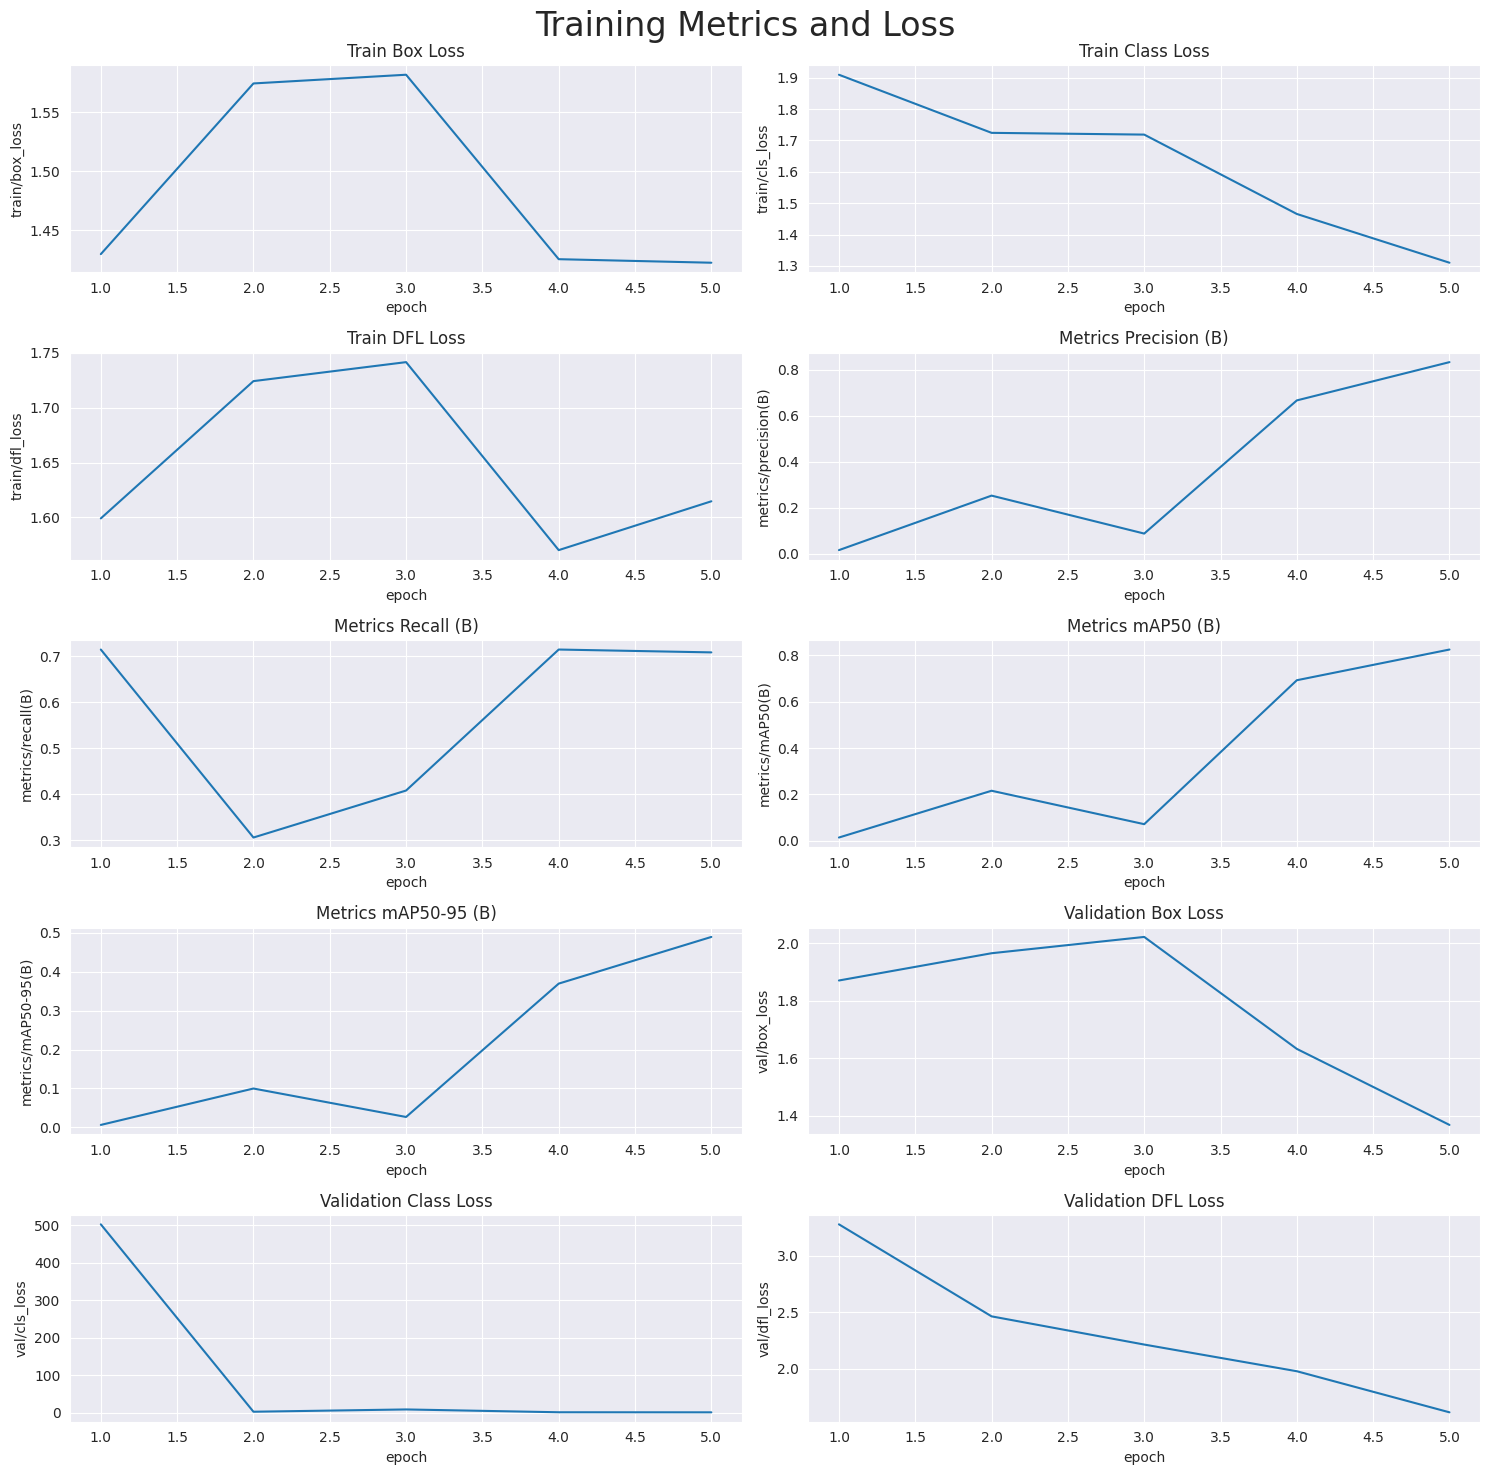

In [ ]:
%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/content/runs/detect/train3/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

For the above plots, **loss** will be a decreasing graph and **metrices** will be a increasing graph.

**Confusion matrix** tells how exactly the model predicts the images.

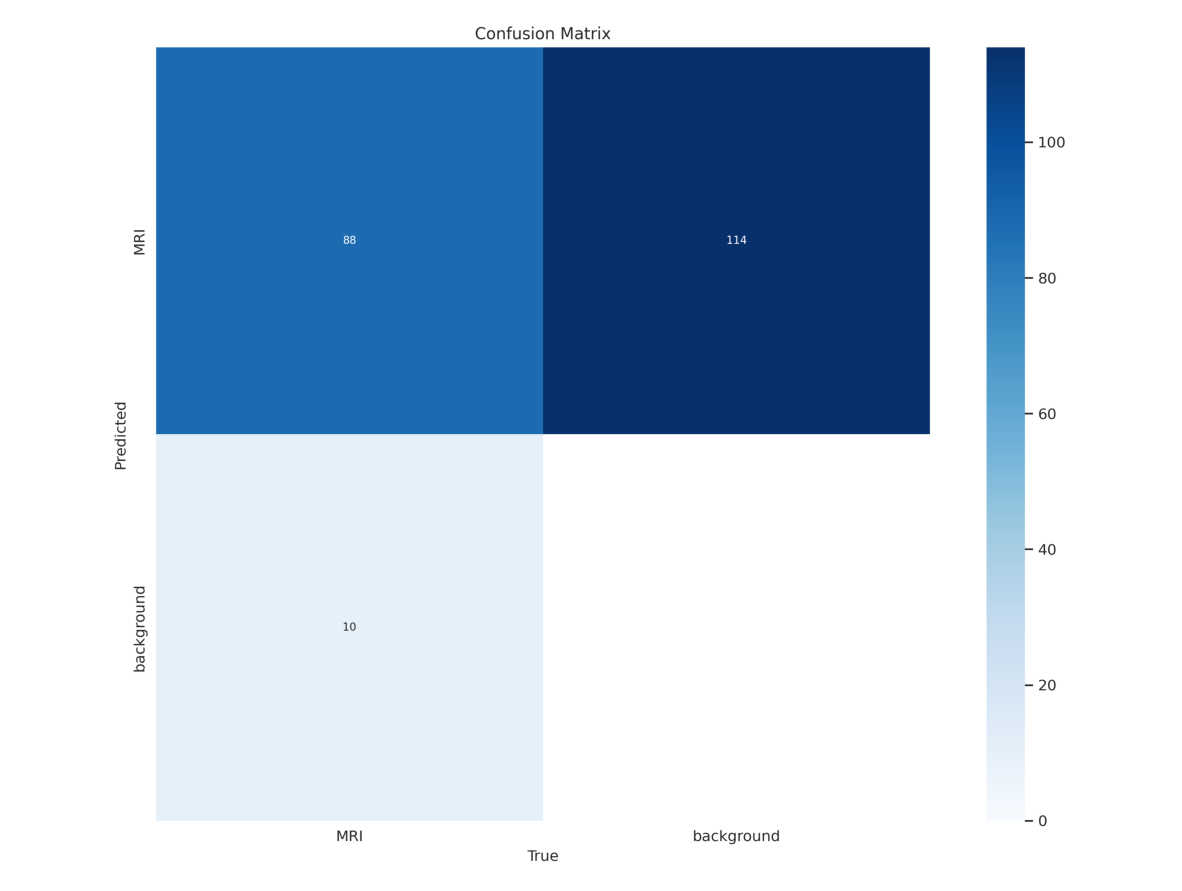

In [ ]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/content/runs/detect/train3/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

At last, we will be predicting an image using our model

In [ ]:
def ship_detect(img_path):

    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()

    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img

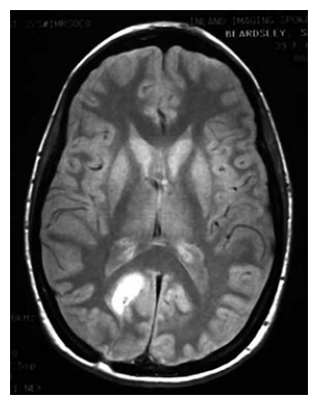

In [ ]:
img0 = "br1.png"
plt.figure(figsize = (5,5))
plt.axis('off')
plt.imshow(mpimg.imread(img0))


0: 640x512 2 MRIs, 122.9ms
Speed: 14.9ms preprocess, 122.9ms inference, 733.8ms postprocess per image at shape (1, 3, 640, 512)


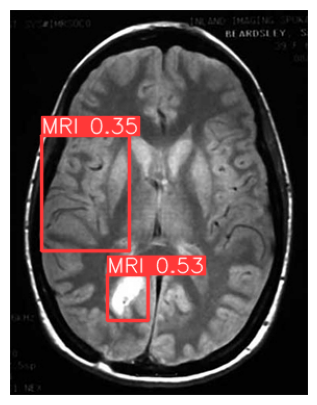

In [ ]:
img0 = "br1.png"
detect_img = ship_detect(img0)
plt.figure(figsize = (5,5))
plt.axis('off')
plt.imshow(detect_img)

This is the end of the project (We will make sure to take the high accuracy annotations). Thus we are successfully detecting the required object.

**THE END**


0: 640x640 1 MRI, 3587.5ms
Speed: 7.6ms preprocess, 3587.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x576 4 MRIs, 1416.2ms
Speed: 4.5ms preprocess, 1416.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 576)

0: 640x544 1 MRI, 1281.0ms
Speed: 4.4ms preprocess, 1281.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)

0: 640x640 1 MRI, 1503.6ms
Speed: 5.8ms preprocess, 1503.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x512 1 MRI, 1242.8ms
Speed: 5.1ms preprocess, 1242.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 512)

0: 640x544 2 MRIs, 1874.6ms
Speed: 4.7ms preprocess, 1874.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)

0: 640x576 3 MRIs, 1837.8ms
Speed: 5.1ms preprocess, 1837.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 576)

0: 640x576 3 MRIs, 1354.4ms
Speed: 4.8ms preprocess, 1354.4ms inference, 1.1ms postprocess per image at sha

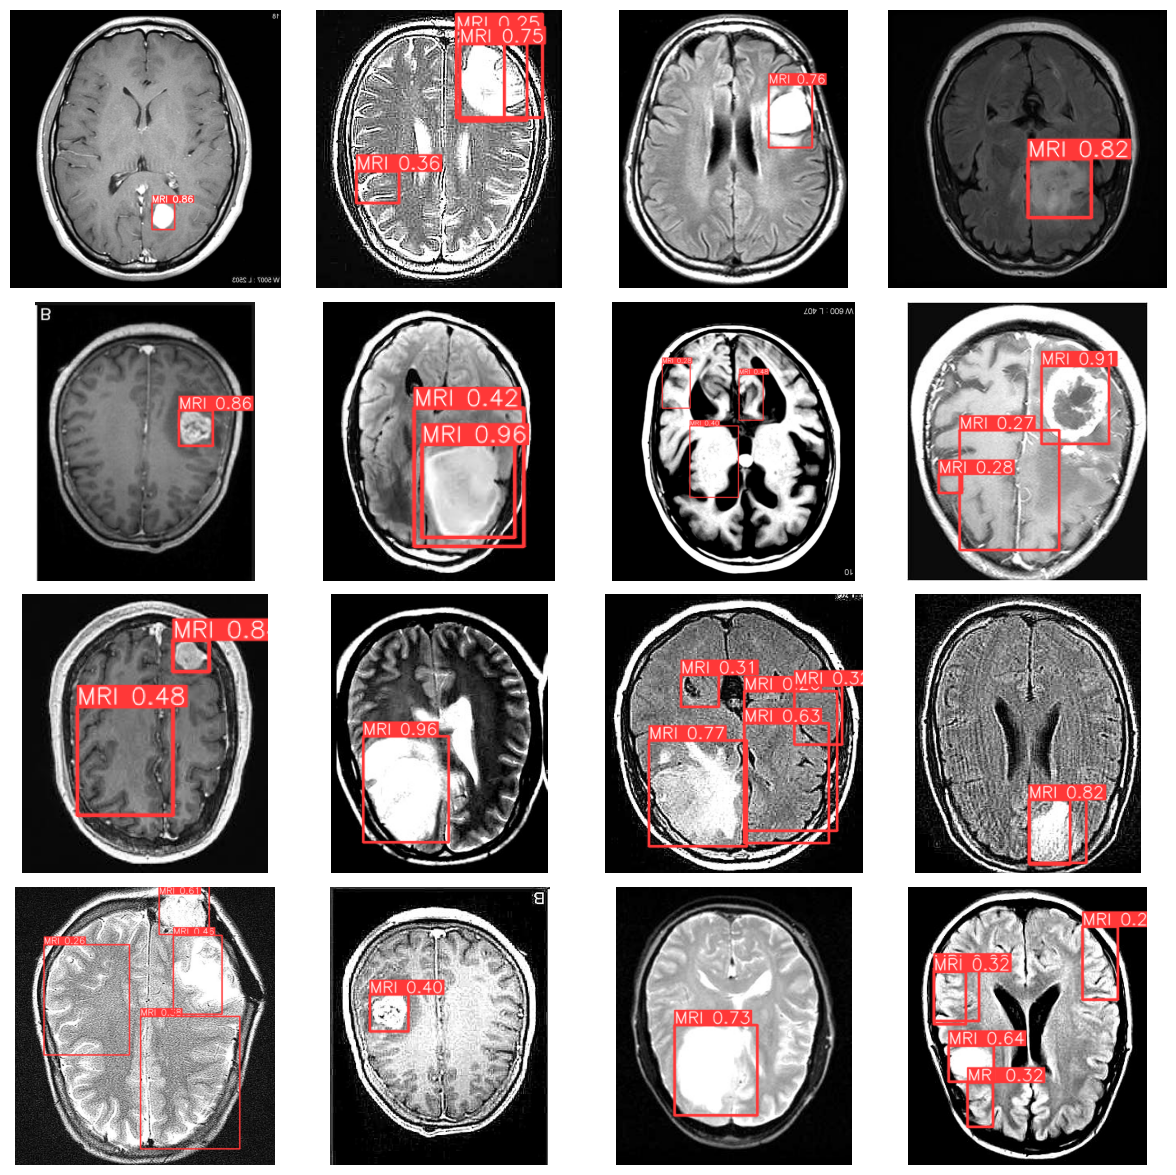

In [ ]:
import random

# Define the directory where the custom images are stored
custom_image_dir = 'train'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)


In [ ]:
model = YOLO('/content/runs/detect/train3/weights/best.pt')  # load a custom trained model

# Export the model
model.export(format='onnx')

Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from '/content/runs/detect/train3/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (49.6 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 171.5 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 13.3s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 18.4s, saved as '/content/runs/detect/train3/weights/best.onnx' (98.8 MB)

Export complete (23.5s)
Results saved to /content/runs/detect/train3/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train3/weights/best.onnx imgsz=640  
Validate:        y

'/content/runs/detect/train3/weights/best.onnx'